In [60]:
print("Merhaba, İGÜ-SEM-Otonom Sistemler")

Merhaba, İGÜ-SEM-Otonom Sistemler


In [61]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import os
os.chdir('/content/drive')
!pwd

/content/drive


In [64]:
!pip install scikit-fuzzy # Kütüphanesi tanımlı olmayan yüklenme işlemi

In [65]:
import sys
import pandas as pd
import skfuzzy as fuzz #fuzz skfuzzy için verdiğimiz tanımlama.
import matplotlib
import matplotlib.pyplot as plt #plt matplotlib için verdiğimiz tanımlama.
import numpy as np

print("Python sürüm no: ", sys.version)
print("Pandas sürüm no: ", pd.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("Skfuzzy Version no:", fuzz.__version__)
print("Numpy Version no:", np.__version__)

Python sürüm no:  3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas sürüm no:  2.2.2
Matplotlib Version: 3.10.0
Skfuzzy Version no: 0.5.0
Numpy Version no: 2.0.2


In [66]:
servis = np.arange(0, 11, 1) #numpy fonksiyonu orta değerin bir eksiği çalışır. 5 yıldız için 6 yazdık.
yemek = np.arange(0, 11, 1)
bahsis = np.arange(0, 101, 1)

In [67]:
SKK = fuzz.trimf(servis, [0, 0, 5])
SKO = fuzz.trimf(servis, [0, 5, 10])
SKI = fuzz.trimf(servis, [5, 10, 10])

In [68]:
YK = fuzz.trimf(yemek, [0, 0, 5]) #(YK,YO,YI - tanımlama.)
YO = fuzz.trimf(yemek, [0, 5, 10])
YI = fuzz.trimf(yemek, [5, 10, 10])

In [69]:
BCK = fuzz.trimf(bahsis, [0, 0, 30]) #Bahşiş aralığı
BK = fuzz.trimf(bahsis, [20, 35, 50])
BO = fuzz.trimf(bahsis, [40, 55, 70])
BI = fuzz.trimf(bahsis, [60, 70, 80])
BCI = fuzz.trimf(bahsis, [70, 100, 100])

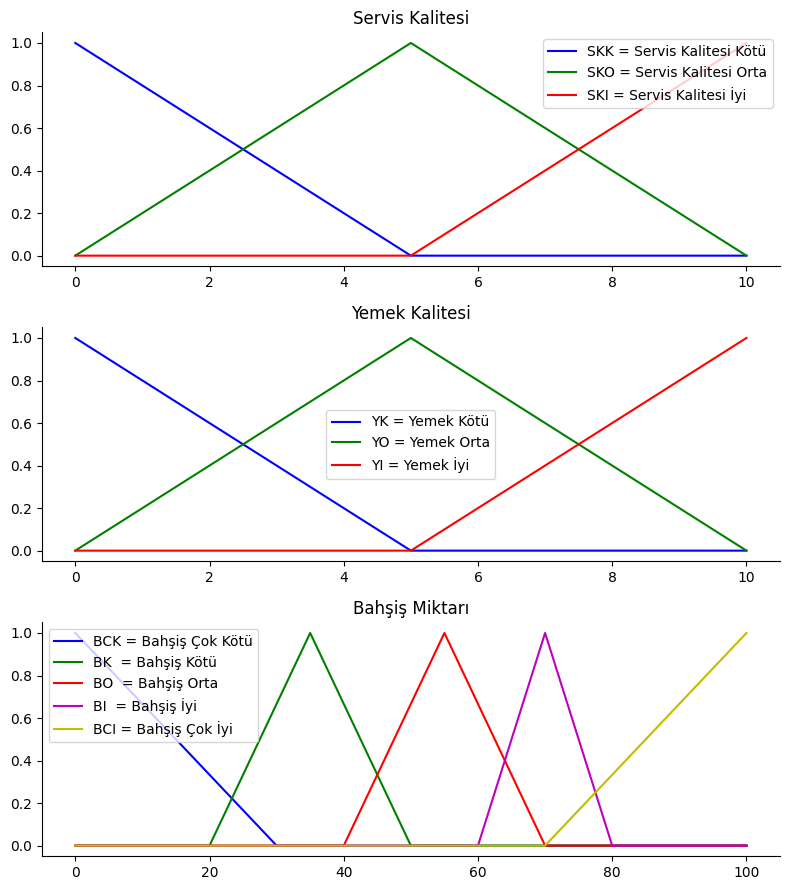

In [70]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(servis, SKK, 'b', linewidth=1.5, label='SKK = Servis Kalitesi Kötü')
ax0.plot(servis, SKO, 'g', linewidth=1.5, label='SKO = Servis Kalitesi Orta')
ax0.plot(servis, SKI, 'r', linewidth=1.5, label='SKI = Servis Kalitesi İyi')
ax0.set_title('Servis Kalitesi')
ax0.legend()

ax1.plot(yemek, YK, 'b', linewidth=1.5, label='YK = Yemek Kötü')
ax1.plot(yemek, YO, 'g', linewidth=1.5, label='YO = Yemek Orta')
ax1.plot(yemek, YI, 'r', linewidth=1.5, label='YI = Yemek İyi')
ax1.set_title('Yemek Kalitesi')
ax1.legend()

ax2.plot(bahsis, BCK, 'b', linewidth=1.5, label='BCK = Bahşiş Çok Kötü')
ax2.plot(bahsis, BK, 'g',  linewidth=1.5, label='BK  = Bahşiş Kötü')
ax2.plot(bahsis, BO, 'r',  linewidth=1.5, label='BO  = Bahşiş Orta')
ax2.plot(bahsis, BI, 'm',  linewidth=1.5, label='BI  = Bahşiş İyi ')
ax2.plot(bahsis, BCI, 'y', linewidth=1.5, label='BCI = Bahşiş Çok İyi')
ax2.set_title('Bahşiş Miktarı')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [71]:
#kullanıcı girişleri
servis_puan = input('Servis Kalitesinin 0 ile 10 puan arasında oylayınız!')
yemek_puan = input('Yemek Kalitesini 0 ile 10 puan arasında oylayınız!')

Servis Kalitesinin 0 ile 10 puan arasında oylayınız!7
Yemek Kalitesini 0 ile 10 puan arasında oylayınız!7


In [72]:
servis_kotu = fuzz.interp_membership(servis, SKK, float(servis_puan)) #Üyelik fonksiyonu ataması
servis_orta = fuzz.interp_membership(servis, SKO, float(servis_puan))
servis_iyi = fuzz.interp_membership(servis, SKI, float(servis_puan))

yemek_kotu = fuzz.interp_membership(yemek, YK, float(yemek_puan))
yemek_orta = fuzz.interp_membership(yemek, YO, float(yemek_puan))
yemek_iyi = fuzz.interp_membership(yemek, YI, float(yemek_puan))

In [73]:
Kural1 = np.fmin(servis_kotu, yemek_kotu)
Kontrol_kural1 = np.fmin(Kural1, BCK)

Kural2 = np.fmin(servis_kotu, yemek_orta)
Kontrol_kural2 = np.fmin(Kural2, BK)

Kural3 = np.fmin(servis_orta, yemek_orta)
Kontrol_kural3 = np.fmin(Kural3, BO)

Kural4 = np.fmin(servis_orta, yemek_iyi)
Kontrol_kural4 = np.fmin(Kural4, BI)

Kural5 = np.fmin(servis_iyi, yemek_kotu)
Kontrol_kural5 = np.fmin(Kural5, BO)

Kural6 = np.fmin(servis_iyi, yemek_iyi)
Kontrol_kural6 = np.fmin(Kural6, BCI)

In [74]:
ctr0 = np.zeros_like(bahsis)

c1 = np.fmax(Kontrol_kural1, Kontrol_kural2)
c2 = np.fmax(Kontrol_kural3, Kontrol_kural4)
c3 = np.fmax(Kontrol_kural5, Kontrol_kural6)

c4 = np.fmax(c2, c3)

toplanan_kurallar = np.fmax(c1,c4)

In [75]:
durulama_islemi = fuzz.defuzz(bahsis, toplanan_kurallar, 'centroid')
islem_sonucu = fuzz.interp_membership(bahsis, toplanan_kurallar, durulama_islemi)

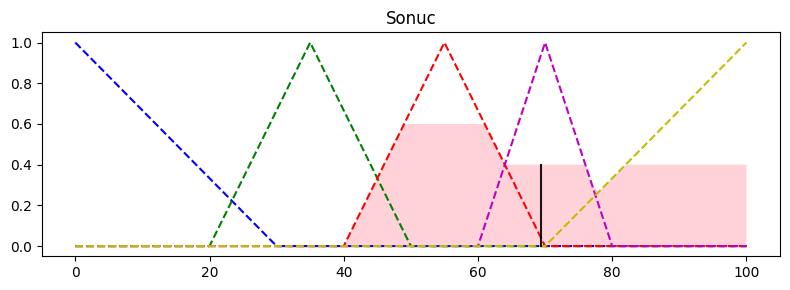

Bahsis_miktarı =  69.40473061760845  TL


In [85]:
fig, ax4 = plt.subplots(figsize=(8,3)) #ax4 = 4.eksen

ax4.plot(bahsis, BCK, 'b', linewidth=1.5, linestyle='--') #blue
ax4.plot(bahsis, BK, 'g',  linewidth=1.5, linestyle='--') #green
ax4.plot(bahsis, BO, 'r',  linewidth=1.5, linestyle='--') #red
ax4.plot(bahsis, BI, 'm',  linewidth=1.5, linestyle='--') #magenta
ax4.plot(bahsis, BCI, 'y', linewidth=1.5, linestyle='--') #yellow

ax4.fill_between(bahsis, ctr0, toplanan_kurallar, facecolor='pink', alpha=0.7)
ax4.plot([durulama_islemi, durulama_islemi], [0, islem_sonucu], 'k', linewidth=1.5, alpha=0.9)
ax4.set_title('Sonuc')
plt.tight_layout()
plt.show()

print("Bahsis_miktarı = ", durulama_islemi, " TL")